In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('datasets/MENS_CLOTHING_SALES_2018 .csv', index_col=0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 4 columns):
AnnualSales        385 non-null float64
Sales              385 non-null float64
SFloorSize         400 non-null int64
TotalInvestment    385 non-null float64
dtypes: float64(3), int64(1)
memory usage: 15.6 KB


In [30]:
# Task 1: Data preparation for clustering
worst_df = df.sort_values(by='Sales', ascending=True)
print(worst_df.head(20))

           AnnualSales      Sales  SFloorSize  TotalInvestment
StoreCode                                                     
310            77369.0   859.6556          90         78894.12
217            77369.0   910.2235          85         45066.89
24             77369.0  1289.4830          60         45066.89
76            156168.0  1382.0180         113         45066.89
163            77369.0  1487.8650          52         45066.89
255            77369.0  1547.3800          50         45066.89
391          1993529.0  1642.1160        1214         78894.12
233          1182183.0  1688.8330         700        123759.04
49            694227.0  1735.5680         400        245000.00
220           795655.0  1768.1220         450         44343.71
37            400000.0  1818.1820         220         45066.89
249           495340.0  1905.1540         260         78894.12
304            77369.0  1934.2250          40         45066.89
108           156168.0  1952.1000          80         1

In [31]:
## Identify significant measurements/values
print('----Annual Sales----')
print(df['AnnualSales'].describe())
print('-------Sales-------')
print(df['Sales'].describe())
print('----SFloorSize----')
print(df['SFloorSize'].describe())
print('----Total Investment----')
print(df['TotalInvestment'].describe())

----Annual Sales----
count    3.840000e+02
mean     8.340187e+05
std      5.853670e+05
min      5.000000e+04
25%      4.953400e+05
50%      6.942270e+05
75%      9.768170e+05
max      5.000000e+06
Name: AnnualSales, dtype: float64
-------Sales-------
count      384.000000
mean      6369.259261
std       3762.989213
min        859.655600
25%       3904.200000
50%       5336.770500
75%       7835.910750
max      27000.000000
Name: Sales, dtype: float64
----SFloorSize----
count     384.000000
mean      150.390625
std       113.192106
min        16.000000
25%        80.000000
50%       120.000000
75%       187.500000
max      1214.000000
Name: SFloorSize, dtype: float64
----Total Investment----
count    3.840000e+02
mean     8.505236e+04
std      1.323628e+05
min      4.000000e+03
25%      3.720704e+04
50%      4.506689e+04
75%      7.889412e+04
max      1.800000e+06
Name: TotalInvestment, dtype: float64


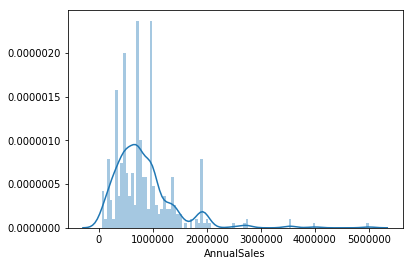

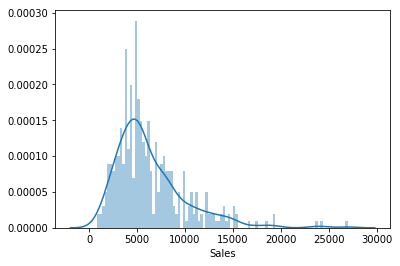

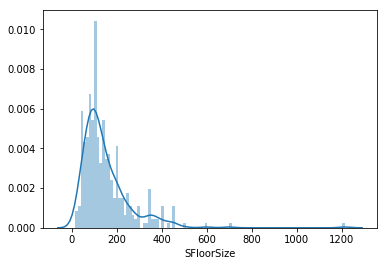

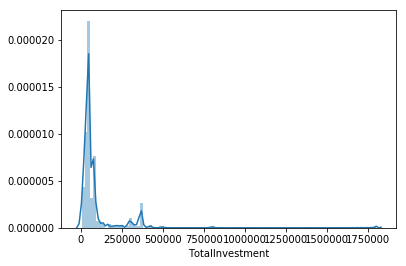

In [32]:
## Further identify erronous values
import seaborn as sns
import matplotlib.pyplot as plt
# Distribution of RegDens
ansales_dist = sns.distplot(df['AnnualSales'].dropna(), bins=100)
plt.show()
# Distribution of MedHHInc
sales_dist = sns.distplot(df['Sales'].dropna(), bins=100)
plt.show()
# Distribution of MeanHHSz
floorsize_dist = sns.distplot(df['SFloorSize'].dropna(), bins=100)
plt.show()
# Distribution of MeanHHSz
totalinvest_dist = sns.distplot(df['TotalInvestment'].dropna(), bins=100)
plt.show()

In [43]:
## Remove SFloorSize is 0 as all other columns are empty with these rows.
df = df[df['SFloorSize'] >= 1]

df.info()

worst_sales = df.sort_values(by='Sales', ascending=False)
worst_sales_drop = worst_sales[:-1]
df = worst_sales_drop
print(worst_sales_drop.sort_values(by='Sales', ascending=True).head(10))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 207 to 24
Data columns (total 4 columns):
AnnualSales        382 non-null float64
Sales              382 non-null float64
SFloorSize         382 non-null int64
TotalInvestment    382 non-null float64
dtypes: float64(3), int64(1)
memory usage: 14.9 KB
           AnnualSales     Sales  SFloorSize  TotalInvestment
StoreCode                                                    
76            156168.0  1382.018         113         45066.89
163            77369.0  1487.865          52         45066.89
255            77369.0  1547.380          50         45066.89
391          1993529.0  1642.116        1214         78894.12
233          1182183.0  1688.833         700        123759.04
49            694227.0  1735.568         400        245000.00
220           795655.0  1768.122         450         44343.71
37            400000.0  1818.182         220         45066.89
249           495340.0  1905.154         260         78894.12
304 

In [35]:
## Identify underperforming store & remove

In [36]:
# Task 2: The first clustering model

In [37]:
## Scale values for clustering model consumption
from sklearn.preprocessing import StandardScaler

df2 = df[['AnnualSales', 'Sales', 'SFloorSize', 'TotalInvestment']]
X = df2.as_matrix()
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [38]:
## Perform kmeans using a normalized set of data
from sklearn.cluster import KMeans

rs = 10

model = KMeans(n_clusters=3, random_state=rs)
model.fit(X)

print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

y = model.predict(X)
df2['Cluster_ID'] = y
print("Number of items per cluster:")
print(df2['Cluster_ID'].value_counts())

Sum of intra-cluster distance: 867.05757478534
Centroid locations:
[ 1.44038841 -0.32668937  1.86493201  1.06142994]
[ 0.49860726  1.56798366 -0.49552381  0.002564  ]
[-0.41860135 -0.3788739  -0.22036047 -0.20563192]
Number of items per cluster:
2    259
1     73
0     50
Name: Cluster_ID, dtype: int64


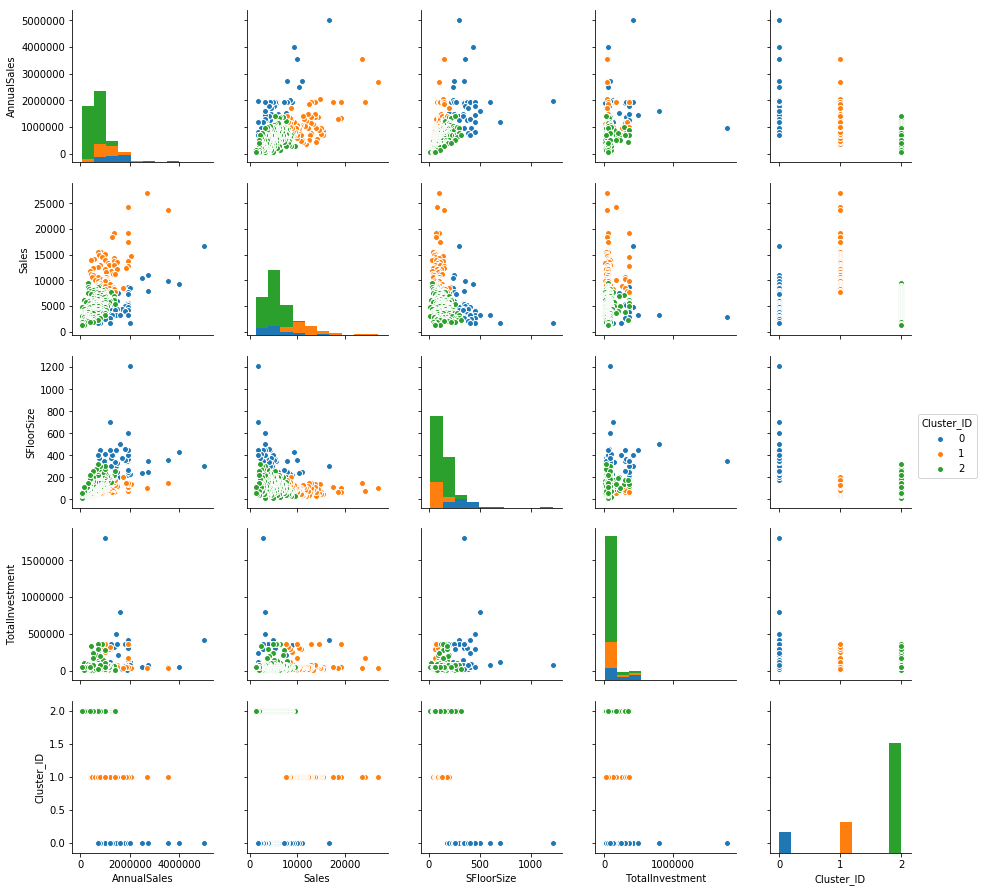

In [39]:
cluster_g = sns.pairplot(df2, hue='Cluster_ID')
plt.show()

In [40]:
## Use raw values for clustering to see how normalization effects the outcome
from sklearn.preprocessing import StandardScaler

df1 = df[['AnnualSales', 'Sales', 'SFloorSize', 'TotalInvestment']]
X = df1.as_matrix()

In [41]:
## Perform kmeans using a raw(un-normalized) set of data
from sklearn.cluster import KMeans

rs = 10

model = KMeans(n_clusters=3, random_state=rs)
model.fit(X)

print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

y = model.predict(X)
df1['Cluster_ID'] = y
print("Number of items per cluster:")
print(df1['Cluster_ID'].value_counts())

Sum of intra-cluster distance: 37667462427052.97
Centroid locations:
[4.77730052e+05 5.31066228e+03 1.04185714e+02 5.87185280e+04]
[2.26414056e+06 1.01839560e+04 3.07125000e+02 1.45070742e+05]
[1.05237606e+06 7.16357148e+03 1.84771429e+02 1.11164213e+05]
Number of items per cluster:
0    210
2    140
1     32
Name: Cluster_ID, dtype: int64


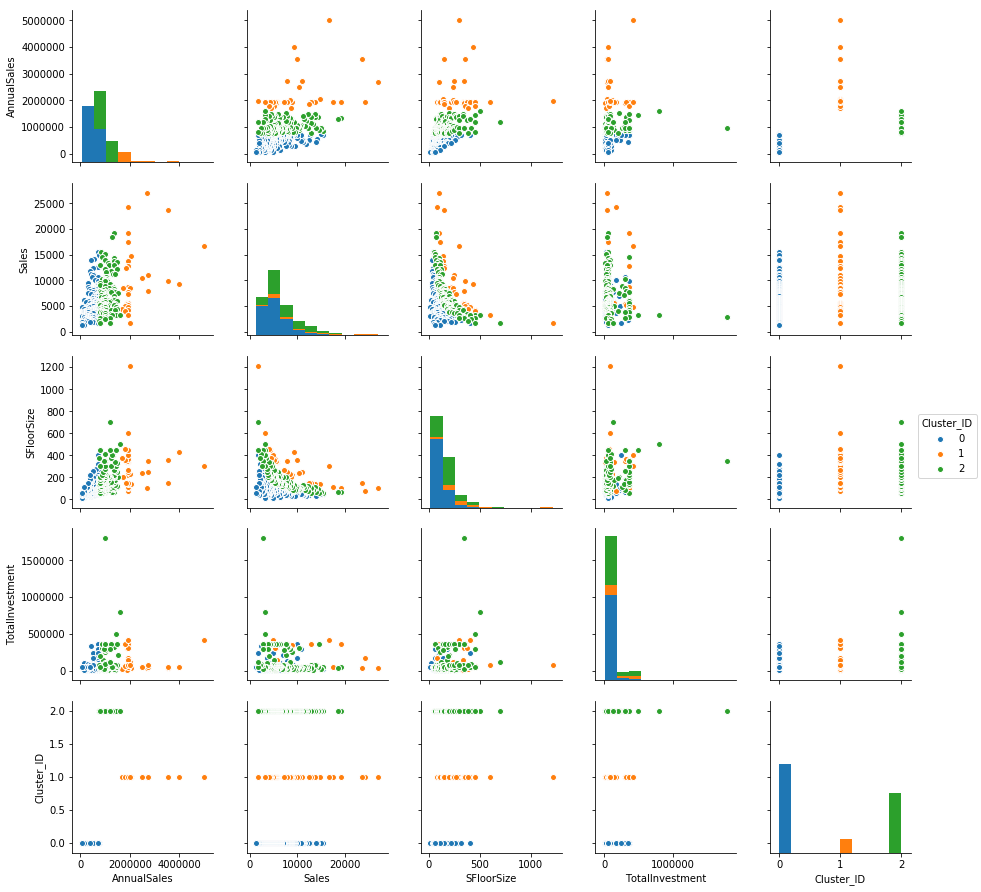

In [42]:
cluster_g = sns.pairplot(df1, hue='Cluster_ID')
plt.show()

Distribution for cluster 0


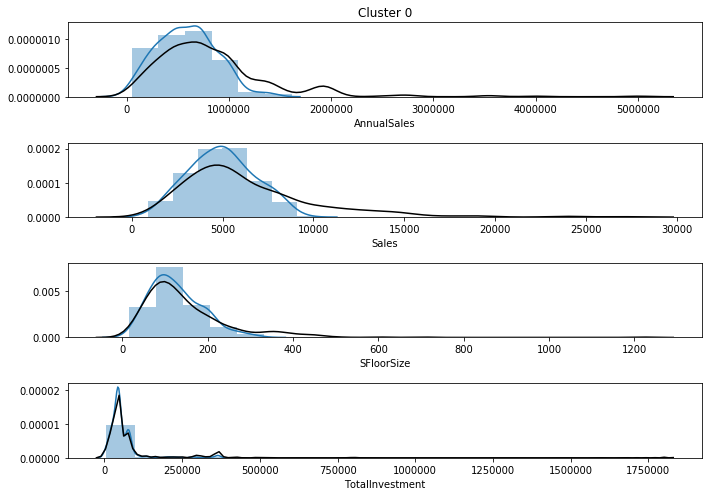

Distribution for cluster 1


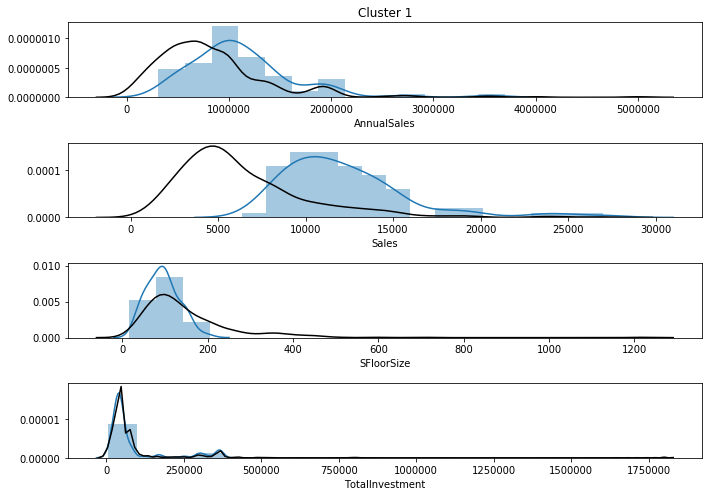

Distribution for cluster 2


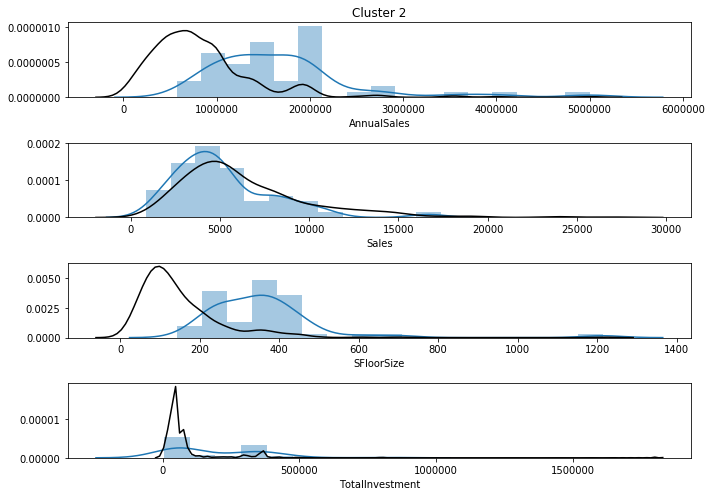

In [23]:
# Ignore warnings to make it a bit more concise
import warnings
warnings.filterwarnings("ignore")

cols = ['AnnualSales', 'Sales', 'SFloorSize', 'TotalInvestment']
n_bins = 20

clusters_to_inspect = [0,1,2]
for cluster in clusters_to_inspect:
    # inspecting cluster 0
    print("Distribution for cluster {}".format(cluster))
    # create subplots
    fig, ax = plt.subplots(nrows=4, figsize=(10,7))
    ax[0].set_title("Cluster {}".format(cluster))
    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df2[col]), max(df2[col]), 20)
        # plot distribution of the cluster using histogram
        sns.distplot(df2[df2['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df2[col], bins=bins, ax=ax[j], hist=False, color="k")
    plt.tight_layout()
    plt.show()

In [24]:
# Task 3 : Refining the clustering model

In [25]:
## Rescale as X is not suitable anymore
X = df2.as_matrix()
scaler = StandardScaler()
X = scaler.fit_transform(X)

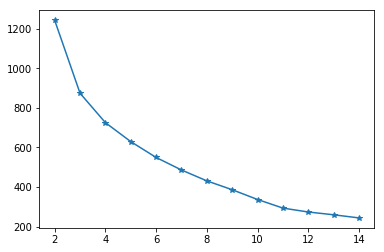

In [26]:
## Test using elbow to find optimal K
clusters = []
inertia_vals = []

for k in range(2, 15, 1):
    model = KMeans(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit(X)

    clusters.append(model)
    inertia_vals.append(model.inertia_)

plt.plot(range(2,15,1), inertia_vals, marker='*')
plt.show()

In [27]:
## Test using sillohette to find optimal K
from sklearn.metrics import silhouette_score
print(clusters[1])
print("Silhouette score for k=3", silhouette_score(X, clusters[1].predict(X)), '\n')
print(clusters[2])
print("Silhouette score for k=4", silhouette_score(X, clusters[2].predict(X)), '\n')

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)
Silhouette score for k=3 0.4991260137091022 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)
Silhouette score for k=4 0.5050002970308124 



Sum of intra-cluster distance: 732.8334976199588
Centroid locations:
[-0.41784274 -0.37844681 -0.22043826 -0.20499528 -0.62919703]
[ 1.47238863 -0.29391863  1.84795202  0.72640897  2.14794849]
[ 0.50449012  1.5709343  -0.49350321  0.00348418  0.75937573]
[ 0.77726041 -0.89774582  2.42921216  9.19089664  2.84223487]
Cluster membership
0    261
2     73
1     48
3      2
Name: Cluster_ID, dtype: int64


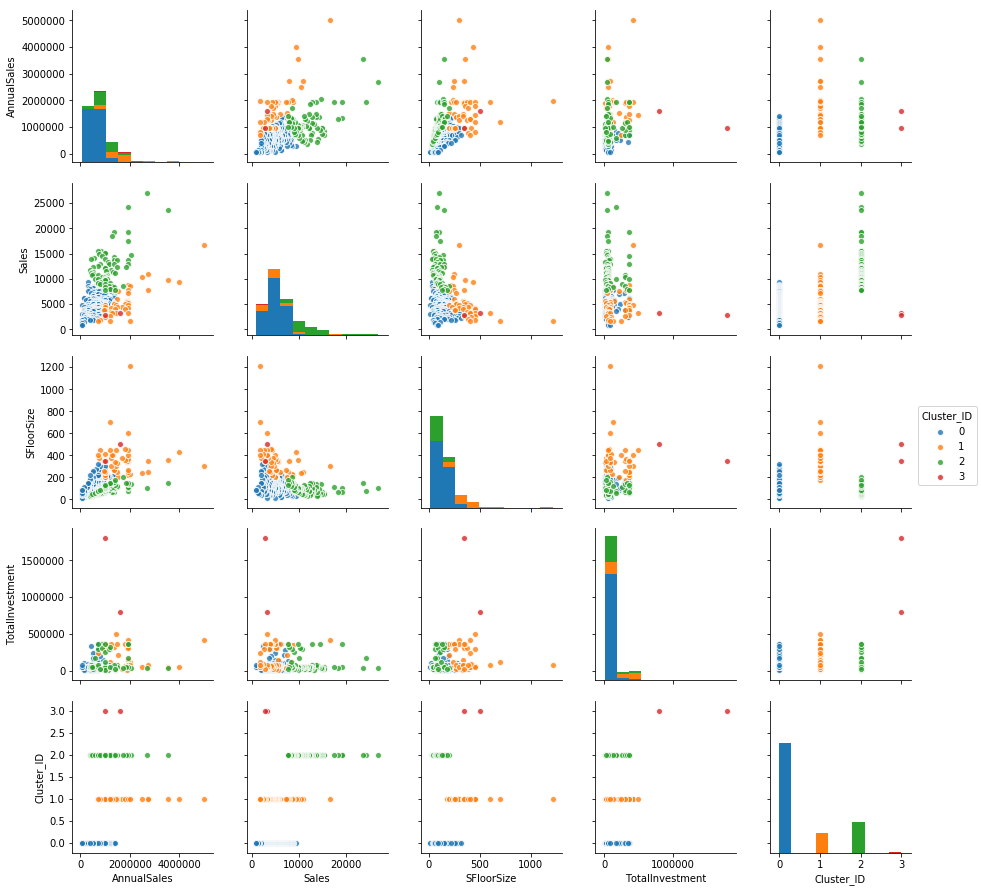

In [28]:
## k=4 is just better than k=3 so it will be used for the number of clusters
model = KMeans(n_clusters=4, random_state=rs)
model.fit(X)

print("Sum of intra-cluster distance:", model.inertia_)
print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)
y = model.predict(X)
df2['Cluster_ID'] = y

print("Cluster membership")
print(df2['Cluster_ID'].value_counts())

cluster_g = sns.pairplot(df2, hue='Cluster_ID', plot_kws={'alpha': 0.8})
plt.show()

In [29]:
## 3 is just used to capture the outliers